In [18]:
#Improved code from tutorial on Genetic Algorithm application
#https://blog.sicara.com/optimization-mutation-genetic-algorithm-40247f8ccb8

#Basically all I did is reducing number of functions with help of lambda and list comprehensions 
#+ improved mutating and breeding alg

import random
import operator
import time
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import functools
import matplotlib.cm as cmx

5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95


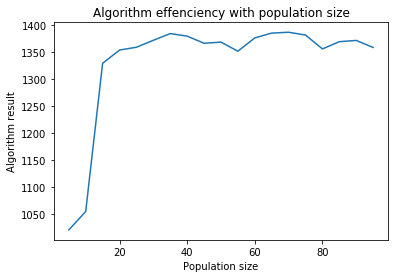

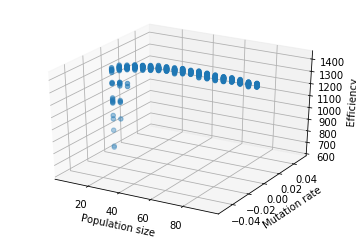

1117.5081813335419


In [17]:
#Generator algorithm
temps1 = time.time()


def gen_all_items(Number_of_item, Max_weight, Max_value):
    generate_one_item = (lambda Max_weight, Max_value: [round(Max_weight*random.random()), round(Max_value*random.random())])
    list_item = [generate_one_item(Max_weight, Max_value) for i in range(Number_of_item)]
    return list_item

#Helper functions

def total_weight_of_item_set(item_set):
    total_weight = sum(item[0] for item in item_set)
    return total_weight

#Individuals

"""Each individual is an array of boolean, the size of the item set. 
For each item, the corresponding value is true if the item is within the bag. 
On the opposite, it’s false if the item isn’t in the bag.
"""

def generate_init_population(item_set, size_of_pop):
    gen_ind = (lambda x: [True if random.random() < 0.5 else False for i in range(len(x))])
    population = [gen_ind(item_set) for i in range(size_of_pop)]
    return population

def weight_of_individual(individual, item_set):
    weight = sum(item_set[i][0] if individual[i] else 0 for i in range(len(individual)))
    return weight

def value_of_individual(individual, item_set):
    value = sum(item_set[i][1] if individual[i] else 0 for i in range(len(individual)))
    return value

#unchanged
def value(individual, item_set):
    Knapsack_Capacity = round(total_weight_of_item_set(item_set) / 2)
    result = 0
    if (weight_of_individual(individual, item_set) <= Knapsack_Capacity):
        result = value_of_individual(individual, item_set)
    return result

def fitness(individual, item_set):
    Knapsack_Capacity = round(total_weight_of_item_set(item_set) / 2)
    result = 0
    if (weight_of_individual(individual, item_set) <= Knapsack_Capacity):
        result = 2 * value_of_individual(individual, item_set) - weight_of_individual(individual, item_set)
    return result


def compare(individual1, individual2):
    return fitness(individual2, item_set) - fitness(individual1, item_set)

def sort_population_by_fitness(population, item_set):
    populationSorted = sorted(population, key=functools.cmp_to_key(compare))
    return populationSorted

"""Selection and reproduction:
For a population, we select the best individuals and random individuals. 
After the selection, each couple of breeders creates 5 children. 
Children’s DNA is created randomly from parents’ DNA
"""

def select_breeders(pop_sorted, size_of_population):
    best_individuals = int(size_of_population / 5)
    lucky_few = int(size_of_population / 5)
    breeders = [pop_sorted[i] for i in range(best_individuals)] + [random.choice(pop_sorted) for i in range(lucky_few)]
    random.shuffle(breeders)
    return breeders

def make_children(breeders, num_of_children):
    make_child = (lambda ind1, ind2: [ind1[i] if random.random()<0.5 else ind2[i] for i in range(len(ind1))])
    children = [make_child(breeders[i], random.choice(breeders)) for i in range(int(len(breeders)/2))]
    return children

#Mutation

def mutate(population, mut_rate):
    mut_ind = (lambda ind, mut_rate: [ind[i] if random.random()>mut_rate else not ind[i] for i in range(len(ind))])
    mutated_population = [mut_ind(ind, mut_rate) for ind in population]
    return mutated_population

#unchanged
def get_best_individual_in_population(populationSorted):
    return populationSorted[0]

def evolve_several_generation_with_limited_time(item_set, size_of_population, number_of_child, time_limit,
                                                mutationRate):
    temps_init = time.time()
    value0 = 0
    result = []
    population = generate_init_population(item_set, size_of_population)
    value0 = max(value0, value(get_best_individual_in_population(population), item_set))
    result.append(value0)
    while (time.time() - temps_init < time_limit):
        population_sorted = sort_population_by_fitness(population, item_set)
        breeders = select_breeders(population_sorted, size_of_population)
        population = make_children(breeders, number_of_child)
        population = mutate(population, mutationRate)
        population = sort_population_by_fitness(population, item_set)
        value0 = max(value0, value(get_best_individual_in_population(population), item_set))
    return value0


# print result:
def mean_result_evolve(item_set, size_of_population, number_of_child, number_of_sample, mutationRate, time_limit):
    meanResult = 0
    for i in range(number_of_sample):
        meanResult += evolve_several_generation_with_limited_time(item_set, size_of_population, number_of_child,
                                                                  time_limit, mutationRate)
    return (meanResult / number_of_sample)


def print_graph(number_of_child, number_of_sample, time_limit, item_set):
    plt.title("Algorithm effenciency with population size")
    plt.ylabel('Algorithm result')
    plt.xlabel('Population size')
    graphX = []
    graphY = []
    for i in range(19):
        size_of_population = 5 * (i + 1)
        print(size_of_population)
        mutationRate = 0
        graphX.append(size_of_population)
        graphY.append(mean_result_evolve(item_set, size_of_population, number_of_child, number_of_sample, mutationRate,
                                         time_limit))
    plt.plot(graphX, graphY)
    plt.show()

def print_3d_graph(number_of_child, number_of_sample, time_limit, item_set):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    ax.set_xlabel('Population size')
    ax.set_ylabel('Mutation rate')
    ax.set_zlabel('Efficiency')

    graphSize = []
    graphMutation = []
    graphResult = []
    for i in range(20):
        mutationRate = int(5*i/100)
        for j in range(19):
            size_of_population = 5*(j+1)
            graphSize.append(size_of_population)
            graphMutation.append(mutationRate)
            graphResult.append(mean_result_evolve(item_set, size_of_population, number_of_child, number_of_sample, mutationRate, time_limit))

    ax.scatter(graphSize, graphMutation, graphResult)
    plt.show()
      
    

# variables
# Knapsack_Capacity = item_set_total_weight / 2
Number_of_item = 500
Max_value = 10
Max_weight = 10

number_of_child = 5
time_limit = 0.25
number_of_sample = 10

# main
item_set = gen_all_items(Number_of_item, Max_weight, Max_value)
print_graph(number_of_child, number_of_sample, time_limit, item_set)
print_3d_graph(number_of_child, number_of_sample, time_limit, item_set)

print (time.time() - temps1)

In [19]:
#Unlike original sol, efficiency does not deteriorte with pop size. 